# WeatherPy

### Observations and Trends:
- There is an inverse relationship between a city's latitude and temperature. As latitude increases, the temperature decreases.
- The plot for Humidity vs Latitude doesn't show any discernable correleation between latitude and humidity. The fact of the matter, is that cities 


In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Determine city from latitude and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-90, 90)
lng_r=(-180, 180)

##### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=200)
lng = np.random.uniform(low=-180, high = 180, size=200)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

46

##### API Calls

In [3]:
# Set up api endpoints
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [4]:
# Loop iterating openweather api calls, adding retrieved data into the city_data dictionary.

city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.75)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving guymon, number 0 of 46.
Retrieving mataura, number 1 of 46.
Retrieving domoni, number 2 of 46.
Retrieving hithadhoo, number 3 of 46.
Retrieving grand baie, number 4 of 46.
Retrieving puerto ayora, number 5 of 46.
Retrieving mahebourg, number 6 of 46.
Retrieving ibotirama, number 7 of 46.
Retrieving ixtapa, number 8 of 46.
Retrieving severo-kurilsk, number 9 of 46.
Retrieving airai, number 10 of 46.
Retrieving avarua, number 11 of 46.
Retrieving ambilobe, number 12 of 46.
Retrieving ponta do sol, number 13 of 46.
Retrieving luderitz, number 14 of 46.
Retrieving cabo san lucas, number 15 of 46.
Retrieving sozopol, number 16 of 46.
Retrieving lufilufi, number 17 of 46.
Retrieving quang ngai, number 18 of 46.
Retrieving atuona, number 19 of 46.
Retrieving jamestown, number 20 of 46.
Retrieving sao joao da barra, number 21 of 46.
Retrieving yumen, number 22 of 46.
Retrieving umm kaddadah, number 23 of 46.
Retrieving remedios,

In [5]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit = 's')
city_data_df.to_csv('Output/city_data.csv')

# city_data_df.dtypes  -- used to validate dtype; uncomment to test

city_data_df.head()

,City_Name,City_Lat,City_Long,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Guymon,36.6828,-101.4816,93.29,27,1,11.50,US,2021-06-15 20:38:42
1,Mataura,-46.1927,168.8643,46.47,98,100,3.24,NZ,2021-06-15 20:38:43
2,Domoni,-12.2569,44.5319,76.75,72,76,7.14,KM,2021-06-15 20:38:44
3,Hithadhoo,-0.6000,73.0833,82.83,73,73,6.69,MV,2021-06-15 20:35:24
4,Grand Baie,-20.0182,57.5802,71.46,75,0,1.99,MU,2021-06-15 20:38:46


### Plotting City Data

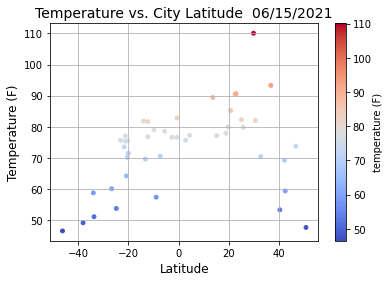

In [6]:
# Plot relationship of Temperature (F) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Temperature'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title(f'Temperature vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/temperature-vs-latitude.png')
plt.show()

#### Temperature vs City Latitude:
The code is analyzing the relationship between the city latitude and temperature. Data is taken from city_data_df, using 'o' as a marker to plot the City_Lat and Temperature as x,y coordinates. Matpltlib's built in colormap is used to map colors to numbers, where the lowest temperature is blue, and the highest temperature is red. 


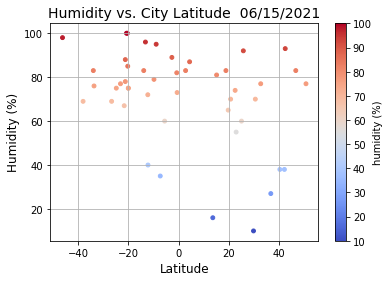

In [7]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Humidity'], 
           c =city_data_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("humidity (%)", labelpad=+1)
plt.grid() # add (True) for test

plt.savefig('Images/humidity-vs-latitude.png')
plt.show()

#### Humidity vs City Latitude:
The code is analyzing the relationship between the city latitude and humidity. Data is taken from city_data_df, using 'o' as a marker to plot the City_Lat and humidity as x,y coordinates. Matpltlib's built in colormap is used to map colors to numbers, where the lowest specific humidity is blue, and the highest humidity is red. 

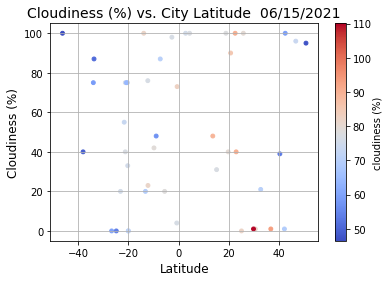

In [8]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Cloudiness'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Cloudiness (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("cloudiness (%)", labelpad=+1)
plt.grid() # add (True) for test

plt.savefig('Images/cloudiness-vs-latitude.png')
plt.show()

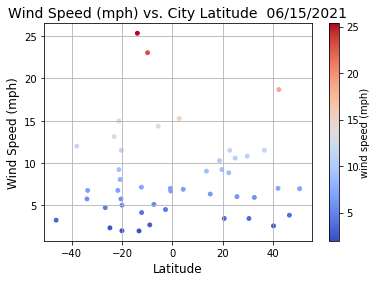

In [9]:
# Plot relationship of Wind Speed (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Wind_Speed'], 
           c =city_data_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Wind Speed (mph) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("wind speed (mph)", labelpad=+1)
plt.grid()

plt.savefig('Images/wind_speed-vs-latitude.png')
plt.show()